In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('Merged Data.txt')
fred = pd.read_csv('Fred_data.csv')

In [2]:
data.head()

,Time,Libor 1Y,JPY,EUR,SPX,VIX,1Y OIS,Positioning,lev Positioning,Signal,...,Libor 3 mo,Libor 6 mo,WILL5000INDFC,NASDAQCOM,VXVCLS,GVZCLS,GOLD_price,DTWEXBGS,SPY Flows,IVV
0,2020-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10793.28223,NaN,NaN,1954.75,NaN,NaN,NaN
1,2020-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,161.93,10910.277,30.75,19.95,1936.1,NaN,NaN,NaN
2,2020-09-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,163.38,11050.469,30.57,20.08,1964.8,NaN,-677.348,-136.024
3,2020-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,163.95,11190.324,30.27,20.32,1963.55,NaN,-1394.940,4492.430
4,2020-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,163.01,11056.652,30.48,20.91,1942.3,NaN,3113.870,67.970


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5275 entries, 0 to 5274
Data columns (total 25 columns):
Time                                        5275 non-null object
Libor 1Y                                    2269 non-null float64
JPY                                         2269 non-null float64
EUR                                         2269 non-null float64
SPX                                         2269 non-null float64
VIX                                         2269 non-null float64
1Y OIS                                      2269 non-null float64
Positioning                                 452 non-null float64
lev Positioning                             452 non-null float64
Signal                                      1230 non-null float64
TradeWeighted USDINdex_AdvancedEconomies    1306 non-null object
FedFunds                                    5271 non-null object
T10Y3M                                      3056 non-null object
T10Y2Y                                   

In [4]:
obj_lis = []
for colname, coltype in data.dtypes.iteritems():
    if coltype == 'object' and colname != 'Time':
        obj_lis.append(colname)

In [5]:
data[obj_lis] = data[obj_lis].replace('',np.nan).replace('.',np.nan).apply(lambda x: x.astype(float), axis=1)

In [6]:
data.describe()

,Libor 1Y,JPY,EUR,SPX,VIX,1Y OIS,Positioning,lev Positioning,Signal,TradeWeighted USDINdex_AdvancedEconomies,...,Libor 3 mo,Libor 6 mo,WILL5000INDFC,NASDAQCOM,VXVCLS,GVZCLS,GOLD_price,DTWEXBGS,SPY Flows,IVV
count,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,452.000000,452.000000,1.230000e+03,1246.000000,...,2956.000000,2956.000000,2948.000000,2950.000000,2948.000000,2948.000000,2958.000000,2909.000000,2948.000000,2947.000000
mean,1.054376,0.958569,0.844024,2228.931376,16.486000,0.806778,151972.347345,-58275.006637,2.739635e+08,109.038174,...,0.841192,1.026064,86.935675,4792.509189,20.679956,18.175037,1338.640974,102.916781,0.236449,35.778398
std,0.838611,0.121633,0.067069,541.049524,6.790288,0.794282,53282.607940,30525.832772,2.838914e+09,2.878350,...,0.767172,0.750849,35.223439,2288.544678,7.629838,6.031901,224.239611,10.780293,1819.660484,429.420049
min,0.211000,0.796000,0.717669,1277.060000,9.140000,0.009000,38139.000000,-144268.000000,-1.235964e+10,101.093000,...,0.222850,0.281880,25.760000,1268.640000,11.850000,8.880000,813.000000,85.489000,-8559.760000,-6901.240000
25%,0.341000,0.888900,0.774863,1862.490000,12.840000,0.144000,104576.000000,-78628.250000,-1.389882e+09,107.115050,...,0.277100,0.434223,54.887500,2802.795000,15.480000,13.770000,1206.500000,92.850400,-1000.210000,-26.704050
50%,0.656000,0.921400,0.864350,2123.480000,14.780000,0.450000,161248.000000,-56571.500000,3.564393e+08,109.494400,...,0.460580,0.727400,86.855000,4550.760000,18.170000,17.305000,1290.300000,102.084800,6.507200,0.000000
75%,1.691000,0.981750,0.897300,2706.050000,17.760000,1.430000,198336.500000,-38010.500000,2.018087e+09,110.883400,...,1.232722,1.453890,115.677500,6575.591500,23.292500,21.115000,1487.637500,113.338100,934.104000,91.539300
max,2.970000,1.312100,0.962650,3580.840000,82.690000,2.638000,245427.000000,31777.000000,1.124086e+10,117.031400,...,2.823750,2.907880,172.270000,12056.441000,72.980000,48.980000,2061.500000,126.471900,12611.300000,6809.120000


In [7]:
def continuous_variable_analysis(df, variable_name, threshold=15):
        df[variable_name].hist(bins=threshold)
        plt.title('{} distribution'.format(variable_name))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fefc1d0>,
      dtype=object)

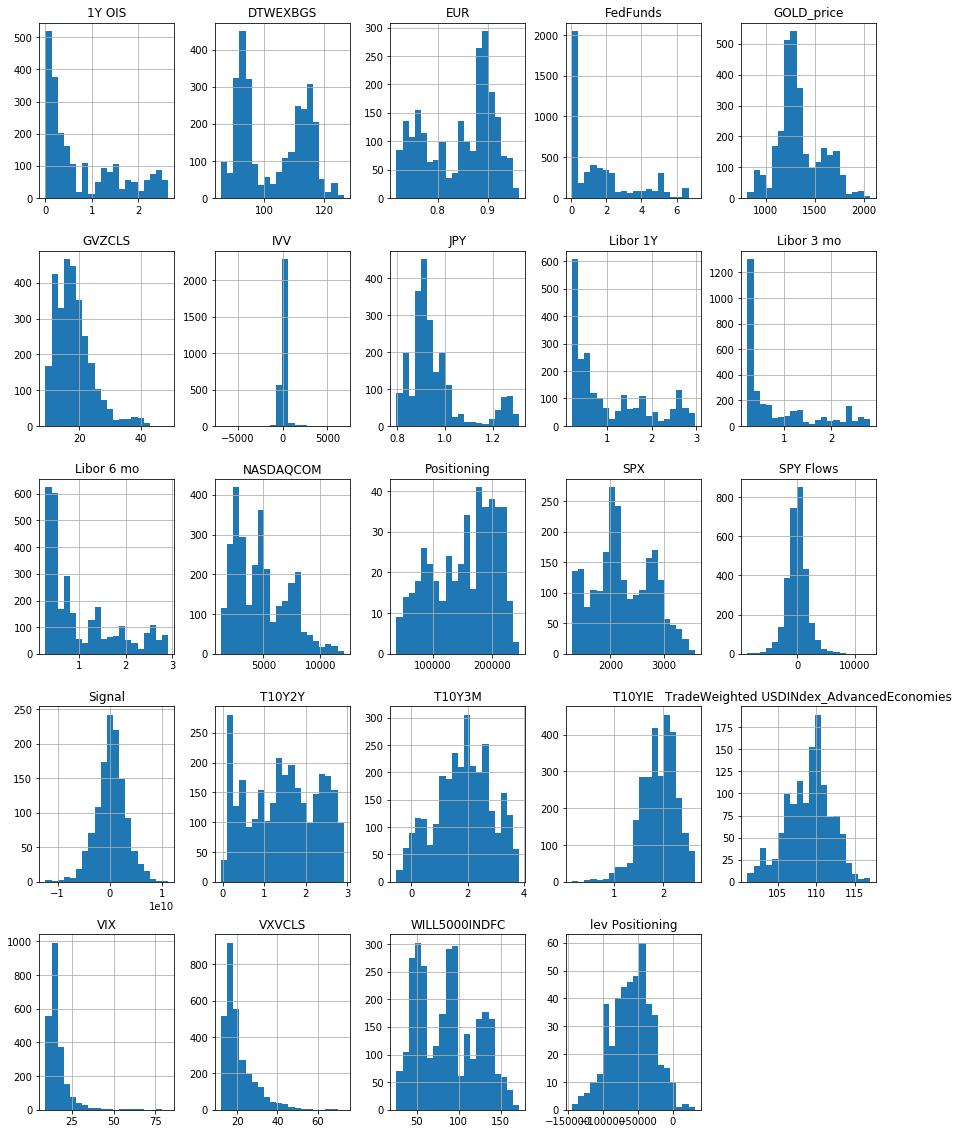

In [8]:
data.hist(bins=20, figsize=(15, 20))